In [1]:
import doc_tool
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec

In [2]:
# not works on jupyter
#import sys,os
#PATH = os.path.dirname(os.path.abspath(__file__))
#print(PATH)
#sys.path.insert(PATH)

In [3]:
docContent = doc_tool.readFile("/home/hmenn/Workspace/doc2graph/dataset/turkishText1.txt")

In [4]:
pureSentences = doc_tool.text2sentences(docContent)

In [5]:
print("Sentences:",pureSentences)

Sentences: ['mazeretler bitince artık okuldan arkadaşlarına görünmeden ayrılmaya başlamıştı ', 'bir gün koridorda bir miktar para   görmüş  parayı almış ve  kendisininmiş gibi cebine atmıştı ', 'önceleri vicdanını kemiren soruları   ama çevrede kimse yoktu  ben almasaydım başkası alacaktı    hâl böyle olunca benim almamın ne mahzuru olabilir ki   diyerek geçiştiriyordu ', 'bir başka gün ranzanın üzerinde her zaman onu pastaneye davet eden çocuklardan birinin cüzdanını görünce  içi bir garip olmuş  etrafı kontrol edip ortalıkta kimseler olmadığını anlayınca cüzdandan bir miktar para almıştı ', 'bu iki olaydan sonra vicdanı onu rahatsız etse de bulduğu mazeretler  onu gerçekleri görmekten uzaklaştırmış   bende para yok    onlarda var  biraz alsam bir şey olmaz    belki arkadaşım memnun da olur ', 'ben olsaydım onun yerinde mutlu olurdum ', 'benim gibi bir kişiye biraz yardım yapmak ona zarar vermez ki   gibi yanlış düşüncelere sevk etmişti ', 'bir vakit sonra  parasını kaybeden talebe şi

In [6]:
stopwords = doc_tool.load_stop_words("/home/hmenn/Workspace/doc2graph/dataset/tr_stopwords.txt")

In [7]:
words = doc_tool.sentences2Words(pureSentences,stopwords)

In [8]:
print("Words:",words)

Words: ['mazeretler', 'bitince', 'okuldan', 'arkadaşlarına', 'görünmeden', 'ayrılmaya', 'başlamıştı', 'gün', 'koridorda', 'miktar', 'para', 'görmüş', 'parayı', 'almış', 'kendisininmiş', 'cebine', 'atmıştı', 'önceleri', 'vicdanını', 'kemiren', 'soruları', 'çevrede', 'yoktu', 'almasaydım', 'başkası', 'alacaktı', 'hâl', 'olunca', 'almamın', 'mahzuru', 'olabilir', 'diyerek', 'geçiştiriyordu', 'başka', 'gün', 'ranzanın', 'üzerinde', 'zaman', 'pastaneye', 'davet', 'çocuklardan', 'birinin', 'cüzdanını', 'görünce', 'içi', 'garip', 'olmuş', 'etrafı', 'kontrol', 'edip', 'ortalıkta', 'kimseler', 'olmadığını', 'anlayınca', 'cüzdandan', 'miktar', 'para', 'almıştı', 'olaydan', 'vicdanı', 'rahatsız', 'etse', 'bulduğu', 'mazeretler', 'gerçekleri', 'görmekten', 'uzaklaştırmış', 'bende', 'para', 'yok', 'onlarda', 'alsam', 'arkadaşım', 'memnun', 'olsaydım', 'yerinde', 'mutlu', 'olurdum', 'kişiye', 'yardım', 'zarar', 'vermez', 'yanlış', 'düşüncelere', 'sevk', 'etmişti', 'vakit', 'parasını', 'kaybeden', 't

In [9]:
textGraph = nx.Graph()

In [10]:
# trace all text and extract simple graph. Each node/word connected with it's prev. word
    
textGraph.add_node(words[0]) 
for i in range(1,len(words)): 
    textGraph.add_node(words[i]) 
    textGraph.add_edge(words[i-1],words[i],weight=1)

In [11]:
print("Nodes[",textGraph.number_of_nodes(),"]:",textGraph.nodes())

Nodes[ 141 ]: ['parasını', 'olsaydım', 'saçakta', 'hâl', 'rahatsız', 'dalda', 'kontrol', 'yurtta', 'çocuğu', 'uzun', 'anlatmadan', 'onlarda', 'başlamıştı', 'bekleyen', 'alsam', 'talebe', 'para', 'alacaktı', 'kedi', 'önceleri', 'idareciler', 'beklediler', 'zaman', 'diyerek', 'zîrâ', 'söylediğine', 'mahzuru', 'sevk', 'arama', 'olmadığını', 'saat', 'birinin', 'olabilir', 'düşüncelere', 'cüzdanını', 'açalım', 'üzerinde', 'yanlış', 'şaşırmışlardı', 'olmuş', 'bende', 'etrafı', 'çağırıp', 'memnun', 'idarecisi', 'bulduğu', 'kişiye', 'cebine', 'hocamıza', 'etse', 'şikâyetçi', 'talebelere', 'almış', 'zordu', 'mazeretler', 'tarafta', 'ayrılmaya', 'dakika', 'vicdanını', 'görünce', 'pastaneye', 'soruları', 'olurdum', 'çevrede', 'kimseler', 'çocuklardan', 'zarar', 'yapacaklarını', 'dondu', 'almamın', 'gerçekleri', 'uzadı', 'hilmi', 'alışkanlık', 'davranalım', 'davet', 'yok', 'uzadıkça', 'salınan', 'getirmiş', 'görünmeden', 'görmüş', 'almıştı', 'kuş', 'kaldı', 'arkadaşlarına', 'parayı', 'yapılmıştı',

In [12]:
print("Edges[",textGraph.number_of_edges(),"]:",textGraph.edges())

Edges[ 156 ]: [('parasını', 'kaybeden'), ('parasını', 'vakit'), ('olsaydım', 'yerinde'), ('olsaydım', 'memnun'), ('saçakta', 'tüneyen'), ('saçakta', 'uzadı'), ('hâl', 'alacaktı'), ('hâl', 'olunca'), ('rahatsız', 'vicdanı'), ('rahatsız', 'etse'), ('dalda', 'kedi'), ('dalda', 'salınan'), ('kontrol', 'etrafı'), ('kontrol', 'edip'), ('yurtta', 'arama'), ('yurtta', 'olmuş'), ('çocuğu', 'beklediler'), ('çocuğu', 'çağırıp'), ('uzun', 'zordu'), ('uzun', 'uzun'), ('uzun', 'düşündüler'), ('anlatmadan', 'yurdun'), ('anlatmadan', 'durumu'), ('onlarda', 'yok'), ('onlarda', 'alsam'), ('başlamıştı', 'ayrılmaya'), ('başlamıştı', 'gün'), ('bekleyen', 'kedi'), ('bekleyen', 'köşesinde'), ('alsam', 'arkadaşım'), ('talebe', 'kaybeden'), ('talebe', 'vakit'), ('talebe', 'getirmiş'), ('talebe', 'şikâyetçi'), ('para', 'yapılmıştı'), ('para', 'yok'), ('para', 'görmüş'), ('para', 'bende'), ('para', 'almıştı'), ('para', 'miktar'), ('para', 'hilmi'), ('alacaktı', 'başkası'), ('önceleri', 'vicdanını'), ('önceleri',

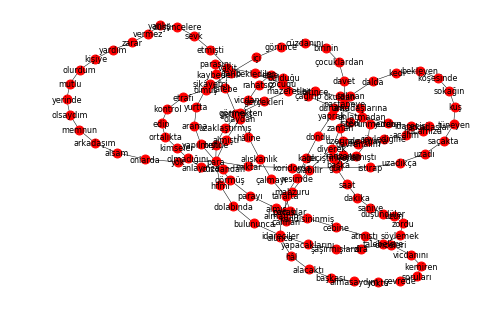

In [13]:
nx.draw(textGraph,width=0.5,node_size=80,font_size=8,with_labels=True)

In [45]:
plt.savefig("/home/hmenn/Workspace/doc2graph/outputs/textGraph.pdf") # save graph to pdf file

In [19]:
graphN2V = Node2Vec(textGraph, dimensions=64, walk_length=30, num_walks=200, workers=4) 

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:24<00:00,  2.07it/s]





In [20]:
model = graphN2V.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [22]:
testWord = "zaman"
similarities = model.wv.most_similar(testWord)  # Output node names are always strings

#save and print results
with open("/home/hmenn/Workspace/doc2graph/outputs/similarity.txt","w") as f:
    f.write("Word:"+testWord+"\n")
    f.write(str(similarities))

print("Similarities of",testWord)
print(similarities)
    

Similarities of uzun
[('düşündüler', 0.8481828570365906), ('zordu', 0.8265682458877563), ('saniye', 0.7992476224899292), ('söylemek', 0.7741044759750366), ('dakika', 0.6241613626480103), ('talebelere', 0.580470860004425), ('saat', 0.4284515976905823), ('diğer', 0.33806800842285156), ('çocuklar', 0.330166220664978), ('parası', 0.209137961268425)]


In [24]:
model.wv.save_word2vec_format("/home/hmenn/Workspace/doc2graph/outputs/node2vec_output.txt")